<a href="https://colab.research.google.com/github/lmcanavals/topics/blob/main/0601_matching_and_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import graphviz as gv

In [2]:
%%file 1.g
4 5
5
6
6 7
0
0 1
2 3
3

Writing 1.g


In [22]:
with open("1.g") as f:
    G = []
    for line in f:
        G.append([(int(x), 0) for x in line.split()])
    print(G)

[[(4, 0), (5, 0)], [(5, 0)], [(6, 0)], [(6, 0), (7, 0)], [(0, 0)], [(0, 0), (1, 0)], [(2, 0), (3, 0)], [(3, 0)]]


In [4]:
def show(G):
    colors = ["#ff7f0e","#1f77b4","#7f7f7f","#2ca02c","#d62728",
              "#9467bd","#8c564b","#e377c2","#bcbd22","#17becf"]
    dot = gv.Graph("x")
    dot.graph_attr["rankdir"] = "LR"
    n = len(G)
    done = set()
    for u in range(n):
        for v, c in G[u]:
            if not f"{u},{v}" in done:
                dot.edge(str(u), str(v), color=colors[c], penwidth="2")
                done.add(f"{u},{v}")
                done.add(f"{v},{u}")
    return dot

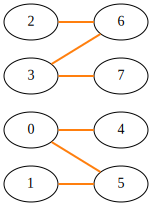

In [15]:
show(G)

In [23]:
n = len(G)
M = []
L = [0, 1, 2, 3]
R = [4, 5, 6, 7]

In [7]:
def freeNode(n):
    for u, v in M:
        if n == u or n == v:
            return False
    return True

In [8]:
def getColor(u, v):
    for v1, c in G[u]:
        if v1 == v:
            return c
    return -1

In [9]:
import pdb

def augmentingPath():
    def dfs(u):
        visited[u] = True
        for v, _ in G[u]:
            if not visited[v]:
                path[v] = u
                dfs(v)
    
    #pdb.set_trace()
    for u in range(n):
        if freeNode(u):
            visited = [False]*n
            path = [-1]*n
            dfs(u)
            for v in range(n):
                if path[v] != -1 and freeNode(v):
                    v1 = v
                    cprev = getColor(v1, path[v1])
                    isAP = True
                    ap = [v1]
                    while path[v1] >= 0:
                        v1 = path[v1]
                        ap.append(v1)
                        c = getColor(v1, path[v1])
                        if cprev == c:
                            isAP = False
                            break
                    if isAP:
                        return ap
    return []

In [10]:
def invertColor(u, v):
    #pdb.set_trace()
    for i in range(len(G[u])):
        if G[u][i][0] == v:
            G[u][i] = (v, 1 if G[u][i][1] == 0 else 0)
             
    for i in range(len(G[v])):
        if G[v][i][0] == u:
            G[v][i] = (u, 1 if G[v][i][1] == 0 else 0)

In [24]:
ap = augmentingPath()
while ap != []:
    #pdb.set_trace()
    #print(ap)
    u = ap[0]
    for v in ap[1:]:
        invertColor(u, v)
        M.append((u, v))
        u = v
    ap = augmentingPath()

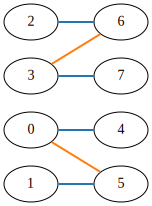

In [25]:
show(G)

In [26]:
M

[(4, 0), (5, 1), (6, 2), (7, 3)]